### 1.0 IMPORT LIBRARIES

In [1]:
import pyforest

### 2.0 READ DATASETS

In [2]:
# Load Dataset
category_tree = pd.read_csv('TMP/category_tree.csv')
events = pd.read_csv('TMP/events.csv')
item_properties_1 = pd.read_csv('TMP/item_properties_part1.1.csv')
item_properties_2 = pd.read_csv('TMP/item_properties_part2.csv')

# Print Shape of each of the dataset
print('Category tree shape:', category_tree.shape)
print('Events shape:', events.shape)
print('Item properties 1 shape:', item_properties_1.shape)
print('Item properties 2 shape:', item_properties_2.shape)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Category tree shape: (1669, 2)
Events shape: (2756101, 5)
Item properties 1 shape: (10999999, 4)
Item properties 2 shape: (9275903, 4)


In [3]:
# Combine the two item properties together
item_props = pd.concat([item_properties_1, item_properties_2], axis=0, ignore_index=True)
print('Merged item_props shape:', item_props.shape)

<IPython.core.display.Javascript object>

Merged item_props shape: (20275902, 4)


### 3.0 DATA UNDERSTANDING

In [4]:
print('Category Tree head:')
display(category_tree.head())

print('\n Events head:')
display(events.head())
        
print('\n Item Props head:')
display(item_props.head())

Category Tree head:


,categoryid,parentid
0,1016,213.0
1,809,169.0
2,570,9.0
3,1691,885.0
4,536,1691.0



 Events head:


,timestamp,visitorid,event,itemid,transactionid
0,1433221332117,257597,view,355908,NaN
1,1433224214164,992329,view,248676,NaN
2,1433221999827,111016,view,318965,NaN
3,1433221955914,483717,view,253185,NaN
4,1433221337106,951259,view,367447,NaN



 Item Props head:


,timestamp,itemid,property,value
0,1435460400000,460429,categoryid,1338
1,1441508400000,206783,888,1116713 960601 n277.200
2,1439089200000,395014,400,n552.000 639502 n720.000 424566
3,1431226800000,59481,790,n15360.000
4,1431831600000,156781,917,828513


In [5]:
# Convert events timestamp to date-time
events['date_time'] = pd.to_datetime(events['timestamp'], unit = 'ms')

# Extract date-time components
events['second'] = events['date_time'].dt.second
events['minute'] = events['date_time'].dt.minute
events['hour'] = events['date_time'].dt.hour
events['day'] = events['date_time'].dt.day
events['month'] = events['date_time'].dt.month
events['year'] = events['date_time'].dt.year

# Define column order
column_order = [
    'timestamp', 'date_time', 'visitorid', 'event', 'itemid', 'transactionid', 'second', 'minute', 'hour', 'day', 'month',  'year'
]

# Reorder the DataFrame
events = events[column_order]

# Display updated DataFrame
print('\n Event Dataset:')
print(f"{'-'*40}\n")
events

<IPython.core.display.Javascript object>


 Event Dataset:
----------------------------------------



,timestamp,date_time,visitorid,event,itemid,transactionid,second,minute,hour,day,month,year
0,1433221332117,2015-06-02 05:02:12.117,257597,view,355908,NaN,12,2,5,2,6,2015
1,1433224214164,2015-06-02 05:50:14.164,992329,view,248676,NaN,14,50,5,2,6,2015
2,1433221999827,2015-06-02 05:13:19.827,111016,view,318965,NaN,19,13,5,2,6,2015
3,1433221955914,2015-06-02 05:12:35.914,483717,view,253185,NaN,35,12,5,2,6,2015
4,1433221337106,2015-06-02 05:02:17.106,951259,view,367447,NaN,17,2,5,2,6,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
2756096,1438398785939,2015-08-01 03:13:05.939,591435,view,261427,NaN,5,13,3,1,8,2015
2756097,1438399813142,2015-08-01 03:30:13.142,762376,view,115946,NaN,13,30,3,1,8,2015
2756098,1438397820527,2015-08-01 02:57:00.527,1251746,view,78144,NaN,0,57,2,1,8,2015
2756099,1438398530703,2015-08-01 03:08:50.703,1184451,view,283392,NaN,50,8,3,1,8,2015


In [6]:
# Convert item properties timestamp to date-time
item_props['date_time'] = pd.to_datetime(item_props['timestamp'], unit = 'ms')

# Extract date-time components
item_props['second'] = item_props['date_time'].dt.second
item_props['minute'] = item_props['date_time'].dt.minute
item_props['hour'] = item_props['date_time'].dt.hour
item_props['day'] = item_props['date_time'].dt.day
item_props['month'] = item_props['date_time'].dt.month
item_props['year'] = item_props['date_time'].dt.year

# Define column order
column_order = [
    'timestamp', 'date_time', 'itemid', 'property', 'value', 'second', 'minute', 'hour', 'day', 'month',  'year'
]

# Reorder the DataFrame
item_props = item_props[column_order]

# Display updated DataFrame
print('\n Item Property Dataset:')
print(f"{'-'*40}\n")
item_props

<IPython.core.display.Javascript object>


 Item Property Dataset:
----------------------------------------



,timestamp,date_time,itemid,property,value,second,minute,hour,day,month,year
0,1435460400000,2015-06-28 03:00:00,460429,categoryid,1338,0,0,3,28,6,2015
1,1441508400000,2015-09-06 03:00:00,206783,888,1116713 960601 n277.200,0,0,3,6,9,2015
2,1439089200000,2015-08-09 03:00:00,395014,400,n552.000 639502 n720.000 424566,0,0,3,9,8,2015
3,1431226800000,2015-05-10 03:00:00,59481,790,n15360.000,0,0,3,10,5,2015
4,1431831600000,2015-05-17 03:00:00,156781,917,828513,0,0,3,17,5,2015
...,...,...,...,...,...,...,...,...,...,...,...
20275897,1433646000000,2015-06-07 03:00:00,236931,929,n12.000,0,0,3,7,6,2015
20275898,1440903600000,2015-08-30 03:00:00,455746,6,150169 639134,0,0,3,30,8,2015
20275899,1439694000000,2015-08-16 03:00:00,347565,686,610834,0,0,3,16,8,2015
20275900,1433646000000,2015-06-07 03:00:00,287231,867,769062,0,0,3,7,6,2015


In [7]:
# Check timespan of data present in both events and item_props dataset

# Events
print('Start Date of Event Dataset: ', events['date_time'].min())
print('End Date of Event Dataset: ', events['date_time'].max())

# Item Property
print('\nStart Date of Item Property Dataset: ', item_props['date_time'].min())
print('End Date of Item Property Dataset: ', item_props['date_time'].max())

Start Date of Event Dataset:  2015-05-03 03:00:04.384000
End Date of Event Dataset:  2015-09-18 02:59:47.788000

Start Date of Item Property Dataset:  2015-05-10 03:00:00
End Date of Item Property Dataset:  2015-09-13 03:00:00


> > ### 3.1 Category Tree Dataset

In [8]:
# Basic info
print('Basic Info')
print(f"{'-'*40}")
category_tree.info()

# Null values
print('\n\n Null Values per Column:')
print(f"{'-'*40}")
print(category_tree.isnull().sum())

# Percentage of null values
print('\n\n Percentage of Null Values per Column:')
print(f"{'-'*40}")
print((category_tree.isnull().sum() / category_tree.shape[0]) * 100)

# Unique values in each column
print('\n\n Unique Values in Each Column:')
print(f"{'-'*40}")
print(category_tree.nunique())

print('\n\n Description of Category Tree Dataset:')
print(f"{'-'*40}")
print(category_tree.describe())

# Distribution of parentid
parentid_distribution = category_tree['parentid'].value_counts()
print('\n\n Parentid distribution:')
print(f"{'-'*40}")
print(parentid_distribution)

Basic Info
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1669 entries, 0 to 1668
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   categoryid  1669 non-null   int64  
 1   parentid    1644 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 26.2 KB


 Null Values per Column:
----------------------------------------
categoryid     0
parentid      25
dtype: int64


 Percentage of Null Values per Column:
----------------------------------------
categoryid    0.000000
parentid      1.497903
dtype: float64


 Unique Values in Each Column:
----------------------------------------
categoryid    1669
parentid       362
dtype: int64


 Description of Category Tree Dataset:
----------------------------------------
        categoryid     parentid
count  1669.000000  1644.000000
mean    849.285201   847.571168
std     490.195116   505.058485
min       0.000000     8.000000
25

>> ### 3.2 Events Dataset

In [9]:
# Basic info
print('Basic Info')
print(f"{'-'*40}")
events.info()

# Null values
print('\n\n Null Values per Column:')
print(f"{'-'*40}")
print(events.isnull().sum())

# Percentage of null values
print('\n\n Percentage of Null Values per Column:')
print(f"{'-'*40}")
print((events.isnull().sum() / events.shape[0]) * 100)

# Unique values in each column
print('\n\n Unique Values in Each Column:')
print(f"{'-'*40}")
print(events.nunique())

# Distribution of 'event' column
print('\n\n Distribution of Event Types')
print(f"{'-'*40}")
event_counts = events['event'].value_counts()
print(event_counts)

print('\n\n Description of Events Dataset:')
print(f"{'-'*40}")
events.describe()

Basic Info
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2756101 entries, 0 to 2756100
Data columns (total 12 columns):
 #   Column         Dtype         
---  ------         -----         
 0   timestamp      int64         
 1   date_time      datetime64[ns]
 2   visitorid      int64         
 3   event          object        
 4   itemid         int64         
 5   transactionid  float64       
 6   second         int32         
 7   minute         int32         
 8   hour           int32         
 9   day            int32         
 10  month          int32         
 11  year           int32         
dtypes: datetime64[ns](1), float64(1), int32(6), int64(3), object(1)
memory usage: 189.2+ MB


 Null Values per Column:
----------------------------------------
timestamp              0
date_time              0
visitorid              0
event                  0
itemid                 0
transactionid    2733644
second                 0
minute   

,timestamp,date_time,visitorid,itemid,transactionid,second,minute,hour,day,month,year
count,2.756101e+06,2756101,2.756101e+06,2.756101e+06,22457.000000,2.756101e+06,2.756101e+06,2.756101e+06,2.756101e+06,2.756101e+06,2756101.0
mean,1.436424e+12,2015-07-09 06:48:08.348103680,7.019229e+05,2.349225e+05,8826.497796,2.952940e+01,2.969765e+01,1.279443e+01,1.538997e+01,6.771084e+00,2015.0
min,1.430622e+12,2015-05-03 03:00:04.384000,0.000000e+00,3.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,5.000000e+00,2015.0
25%,1.433478e+12,2015-06-05 04:23:14.792000,3.505660e+05,1.181200e+05,4411.000000,1.500000e+01,1.500000e+01,4.000000e+00,8.000000e+00,6.000000e+00,2015.0
50%,1.436453e+12,2015-07-09 14:43:33.599000064,7.020600e+05,2.360670e+05,8813.000000,3.000000e+01,3.000000e+01,1.600000e+01,1.500000e+01,7.000000e+00,2015.0
75%,1.439225e+12,2015-08-10 16:45:05.168000,1.053437e+06,3.507150e+05,13224.000000,4.500000e+01,4.500000e+01,2.000000e+01,2.300000e+01,8.000000e+00,2015.0
max,1.442545e+12,2015-09-18 02:59:47.788000,1.407579e+06,4.668670e+05,17671.000000,5.900000e+01,5.900000e+01,2.300000e+01,3.100000e+01,9.000000e+00,2015.0
std,3.366312e+09,NaN,4.056875e+05,1.341954e+05,5098.996290,1.730761e+01,1.733134e+01,7.867598e+00,8.667102e+00,1.291455e+00,0.0


>> ### 3.3 Item Properties Dataset

In [10]:
# Basic info
print('Basic Info')
print(f"{'-'*40}")
item_props.info()

# Null values
print('\n\n Null Values per Column:')
print(f"{'-'*40}")
print(item_props.isnull().sum())

# Percentage of null values
print('\n\n Percentage of Null Values per Column:')
print(f"{'-'*40}")
print((item_props.isnull().sum() / item_props.shape[0]) * 100)

# Unique values in each column
print('\n\n Unique Values in Each Column:')
print(f"{'-'*40}")
print(item_props.nunique())

print('\n\n Description of Item Properties Dataset:')
print(f"{'-'*40}")
item_props.describe()

Basic Info
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20275902 entries, 0 to 20275901
Data columns (total 11 columns):
 #   Column     Dtype         
---  ------     -----         
 0   timestamp  int64         
 1   date_time  datetime64[ns]
 2   itemid     int64         
 3   property   object        
 4   value      object        
 5   second     int32         
 6   minute     int32         
 7   hour       int32         
 8   day        int32         
 9   month      int32         
 10  year       int32         
dtypes: datetime64[ns](1), int32(6), int64(2), object(2)
memory usage: 1.2+ GB


 Null Values per Column:
----------------------------------------
timestamp    0
date_time    0
itemid       0
property     0
value        0
second       0
minute       0
hour         0
day          0
month        0
year         0
dtype: int64


 Percentage of Null Values per Column:
----------------------------------------
timestamp    0.0
date_t

,timestamp,date_time,itemid,second,minute,hour,day,month,year
count,2.027590e+07,20275902,2.027590e+07,20275902.0,20275902.0,20275902.0,2.027590e+07,2.027590e+07,20275902.0
mean,1.435157e+12,2015-06-24 14:42:23.682880256,2.333904e+05,0.0,0.0,3.0,1.799168e+01,6.220669e+00,2015.0
min,1.431227e+12,2015-05-10 03:00:00,0.000000e+00,0.0,0.0,3.0,2.000000e+00,5.000000e+00,2015.0
25%,1.432436e+12,2015-05-24 03:00:00,1.165160e+05,0.0,0.0,3.0,1.000000e+01,5.000000e+00,2015.0
50%,1.433646e+12,2015-06-07 03:00:00,2.334830e+05,0.0,0.0,3.0,1.600000e+01,6.000000e+00,2015.0
75%,1.437880e+12,2015-07-26 03:00:00,3.503040e+05,0.0,0.0,3.0,2.800000e+01,7.000000e+00,2015.0
max,1.442113e+12,2015-09-13 03:00:00,4.668660e+05,0.0,0.0,3.0,3.100000e+01,9.000000e+00,2015.0
std,3.327798e+09,NaN,1.348452e+05,0.0,0.0,0.0,9.067004e+00,1.307510e+00,0.0


`Comment`

- **Category Tree Dataset**
    - The **Category Tree** dataset has **1,669** rows and two columns, *categoryid* and *parentid*.
    - Few null values (25) in the *parentid* columns corresponding to **1.497903%**.
    - There are 1,669 unique category IDs (every row is a distinct category) and 362 unique parent IDs, (362 distinct parent categories).
    - parentid 250.0 has 31 categories (children), the largest observed.
<br><br>
- **Events Dataset**
    - There were **2,756,101** total rows and 5 columns (timestamp, visitorid, event, itemid, transactionid)
    - transactionid has **~2.73 million** nulls, i.e., **99.185%** of the dataset. This is expected since transactions are relatively rare events.
    - Also, the following were observed:
        - timestamp: **~2.75 million** unique values
        - visitorid: **~1.41 million** unique users.
        - event: **3** distinct types (view, addtocart, transaction).
        - itemid: **~235k** unique items.
        - transactionid: **~17.7k** unique transaction IDs
        - The dataset span from **2015-05-03 03:00:04.384000** to **2015-09-18 02:59:47.788000**

`Note:`
- The high null values rate for transactionid confirms that most events are non-transactional (either 'view' or 'addtocart').
- Views are the largest share of events, followed by fewer 'addtocart' and 'transaction'.
<br><br>
- **Item Properties Dataset**
    - There were two item properties datasets joined together to give a shape of **20,275,902** rows and 4 columns (timestamp, itemid, property, value).
    - There were **no null values** in any column
    - The followings were also observed:
        - timestamp: **18** unique values.
        - itemid: **~417k** unique items.
        - property: **1,104** distinct property names.
        - value: **~1.97 million** distinct values.
        - The Dataset span from **2015-05-10 03:00:00** to **2015-09-13 03:00:00**

### 4.0 EXPLORATORY DATA ANALYSIS (EDA)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

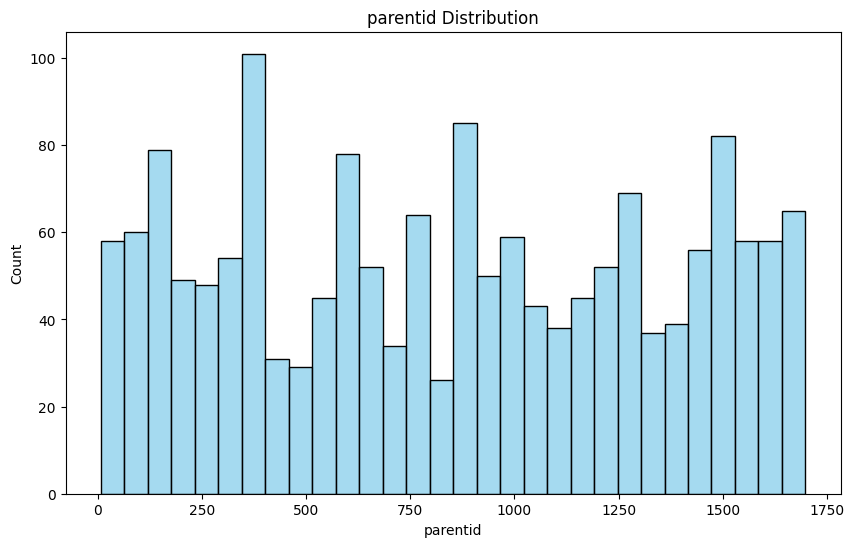

In [11]:
# Distribution of parentid
plt.figure(figsize = (10, 6))
sns.histplot(category_tree['parentid'], bins = 30, color = 'skyblue')
plt.title('parentid Distribution')
plt.xlabel('parentid')
plt.ylabel('Count')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

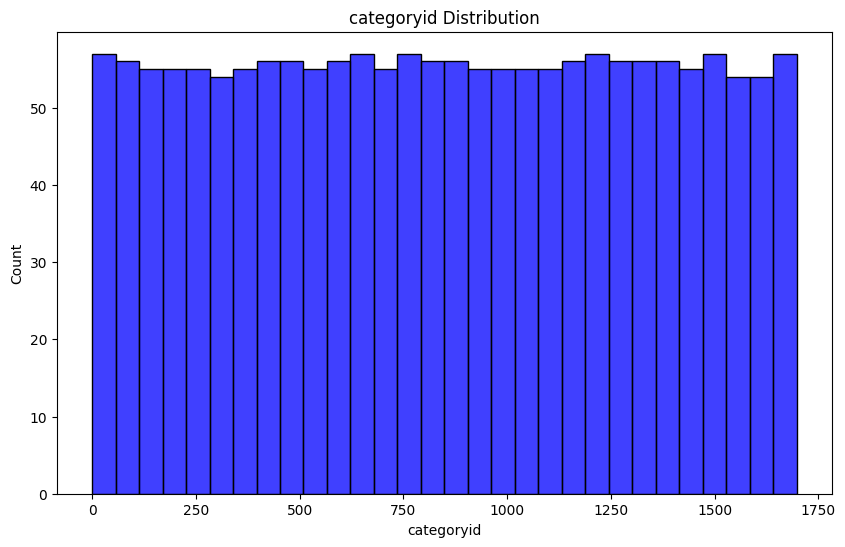

In [12]:
# Distribution of categoryid
plt.figure(figsize = (10, 6))
sns.histplot(category_tree['categoryid'], bins = 30, color = 'blue')
plt.title('categoryid Distribution')
plt.xlabel('categoryid')
plt.ylabel('Count')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

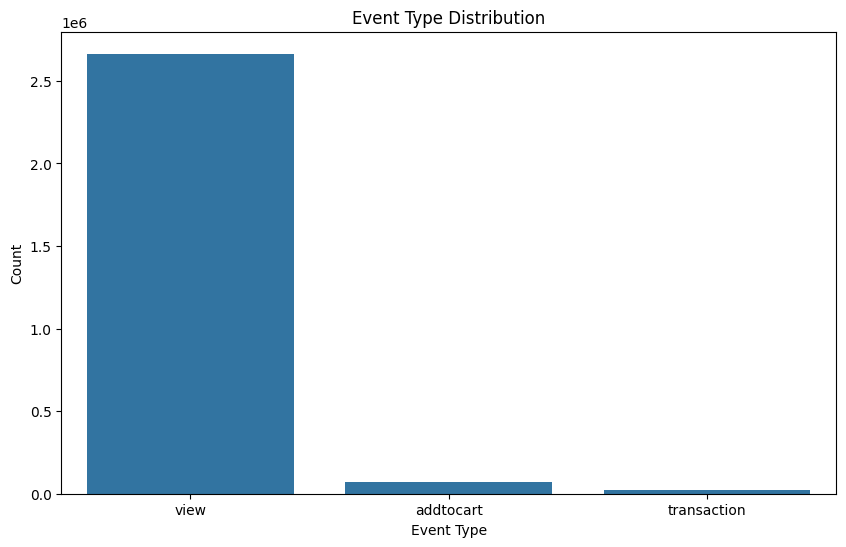

In [13]:
# Distribution of Event Type
plt.figure(figsize=(10, 6))
sns.countplot(x = 'event', data = events, order = event_counts.index)
plt.title('Event Type Distribution')
plt.xlabel('Event Type')
plt.ylabel('Count')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

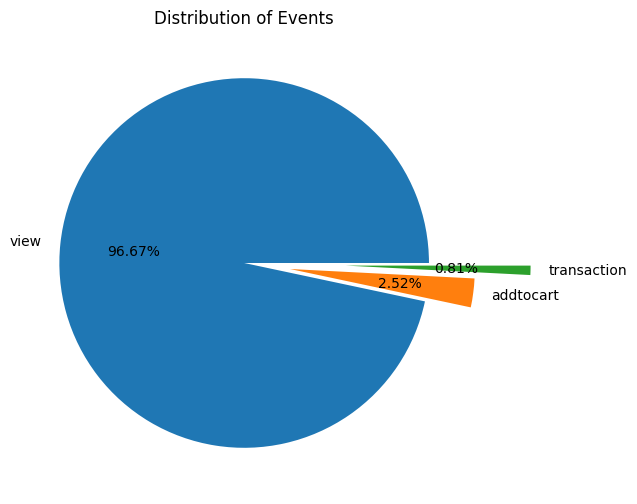

In [14]:
# Distribution of Events
events_count = events['event'].value_counts()
plt.figure(figsize=(10, 6))
explode = (0, 0.25, 0.55)
plt.pie(events_count.values, explode = explode, labels = events_count.index, autopct = '%1.2f%%')
plt.title('Distribution of Events')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

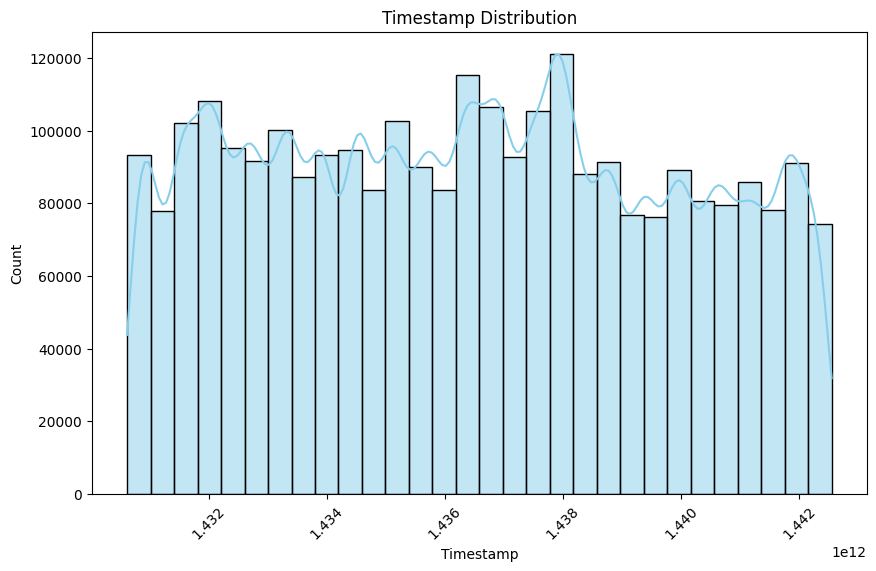

In [15]:
# Events Timestamp Distribution
plt.figure(figsize = (10, 6))
sns.histplot(events['timestamp'], bins = 30, kde = True, color = 'skyblue')
plt.title('Timestamp Distribution')
plt.xlabel('Timestamp')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

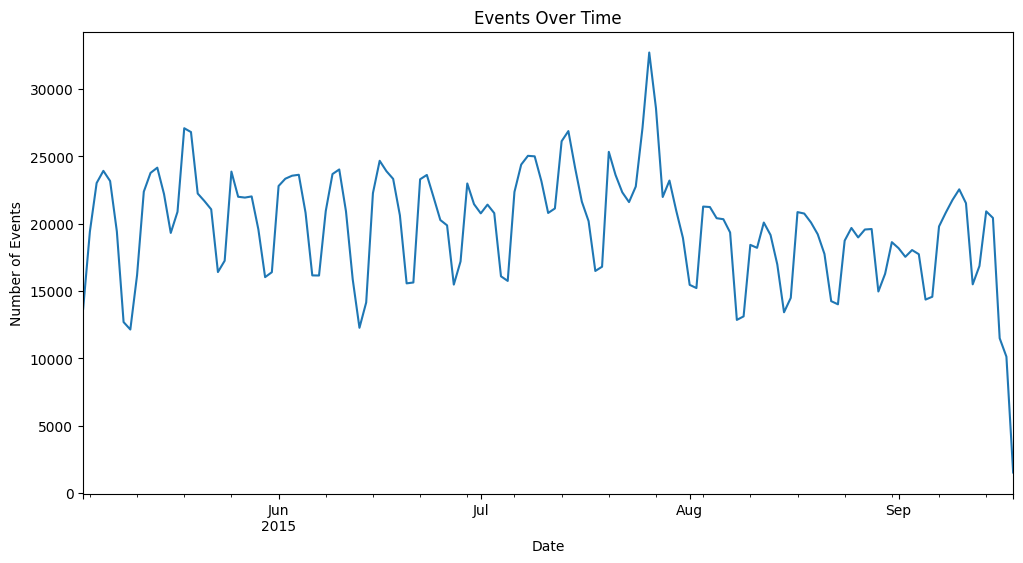

In [16]:
# Events over time
daily_events = events.resample('D', on = 'date_time').count()
plt.figure(figsize = (12, 6))
daily_events['event'].plot()
plt.title('Events Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

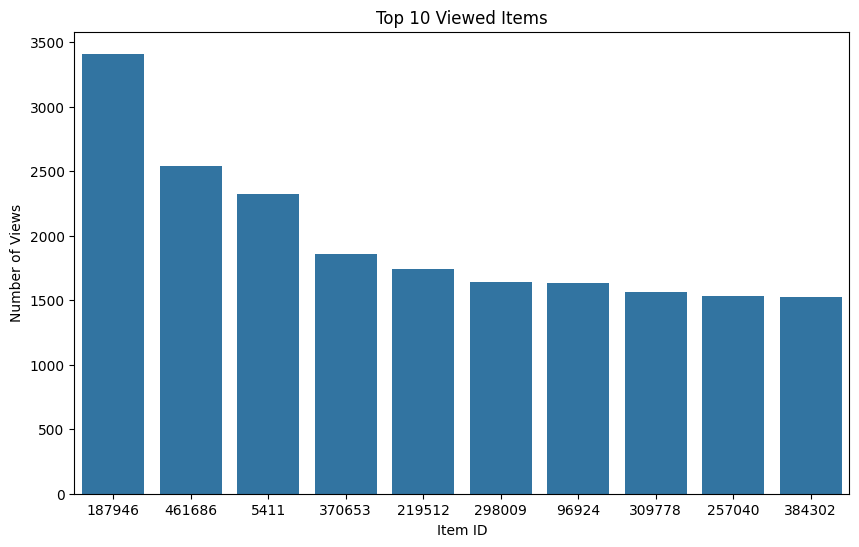

In [17]:
# Get all viewed items and count occurrences
viewed_items = events[events['event'] == 'view']['itemid'].value_counts()

# Top 10 Viewed items
top_viewed_items = viewed_items.sort_values(ascending = False).head(10)

# Plot
plt.figure(figsize = (10, 6))
sns.barplot(x = top_viewed_items.index, y = top_viewed_items.values, order = top_viewed_items.index)
plt.title('Top 10 Viewed Items')
plt.xlabel('Item ID')
plt.ylabel('Number of Views')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

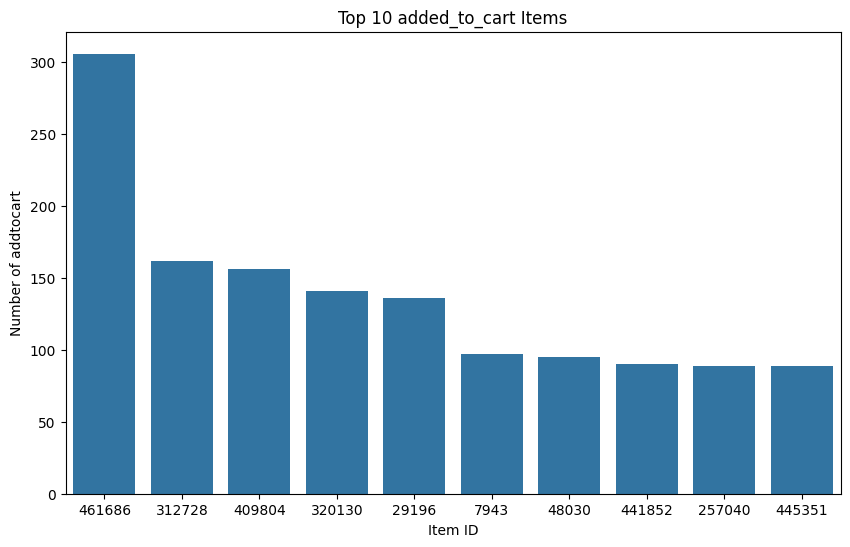

In [18]:
# Get all added_to_cart items and count occurrences
added_to_cart_items = events[events['event'] == 'addtocart']['itemid'].value_counts()

# Top 10 added_to_cart items
top_added_to_cart_items = added_to_cart_items.sort_values(ascending = False).head(10)

# Plot
plt.figure(figsize = (10, 6) )
sns.barplot(x = top_added_to_cart_items.index , y = top_added_to_cart_items.values, order = top_added_to_cart_items.index)
plt.title('Top 10 added_to_cart Items')
plt.xlabel('Item ID')
plt.ylabel('Number of addtocart')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

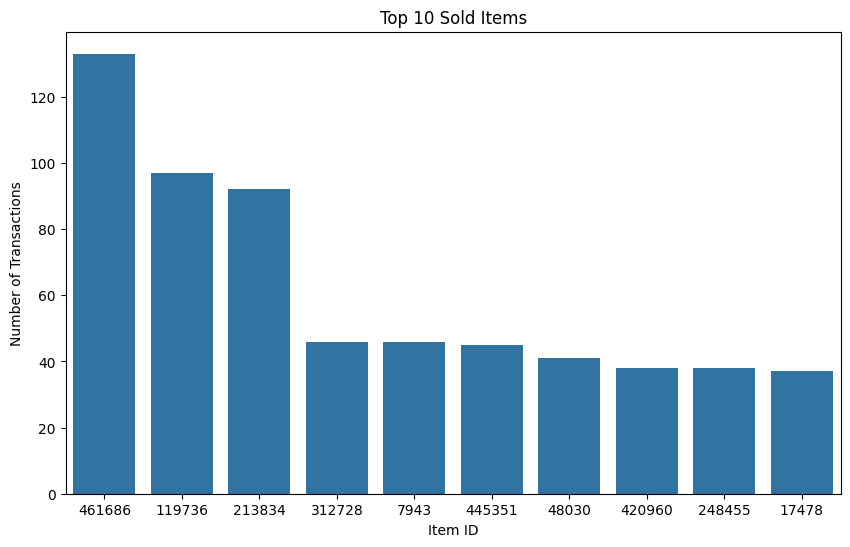

In [19]:
# Get all sold items and count occurrences
sold_items = events[events['event'] == 'transaction']['itemid'].value_counts()

# Top 10 sold items
top_sold_items = sold_items.sort_values(ascending = False).head(10)

# Plot
plt.figure(figsize = (10, 6))
sns.barplot(x = top_sold_items.index, y = top_sold_items.values, order = top_sold_items.index)
plt.title('Top 10 Sold Items')
plt.xlabel('Item ID')
plt.ylabel('Number of Transactions')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

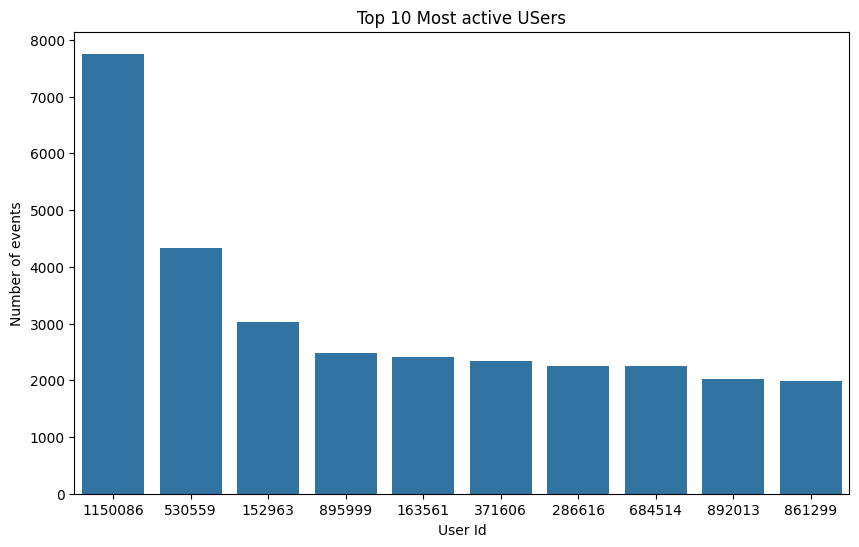

In [20]:
# Get all active users and count occurrences
active_users = events['visitorid'].value_counts()

# Top 10 most active users
top_active_users = active_users.sort_values(ascending = False).head(10)

# Plot
plt.figure(figsize = (10, 6))
sns.barplot(x = top_active_users.index, y = top_active_users.values, order = top_active_users.index)
plt.title('Top 10 Most active USers')
plt.xlabel('User Id')
plt.ylabel('Number of events')
plt.show()

In [21]:
# Proportion of user journeys following 'view' -> 'addtocart' -> 'transaction'
events_sorted = events.sort_values(by = ['visitorid', 'timestamp'])

def journey_proportion(events_sorted):
    user = events_sorted.groupby('visitorid')['event'].apply(list)
    total_users = len(user)
    path_count = sum(1 for path in user if ['view', 'addtocart', 'transaction'] == 
                     [event for event in path if event in {'view', 'addtocart', 'transaction'}])
    
    return path_count, total_users

journey_count, total_users = journey_proportion(events_sorted)
journey_prop = journey_count / total_users

print(f"User journeys with 'view' --> 'addtocart' --> 'transaction': {journey_count} out of {total_users} ({journey_prop:.2%})\n")


# Proportion of views resulting in add-to-cart and add-to-cart resulting in transactions
views = events[events['event'] == 'view'].groupby('visitorid')['itemid'].count()
add_to_carts = events[events['event'] == 'addtocart'].groupby('visitorid')['itemid'].count()
transactions = events[events['event'] == 'transaction'].groupby('visitorid')['itemid'].count()
view_to_cart = (add_to_carts.sum() / views.sum())
cart_to_transaction = (transactions.sum() / add_to_carts.sum())

print(f"Proportion of views resulting in add-to-cart: {view_to_cart: .2%}\n")
print(f"Proportion of add-to-carts resulting in transactions: {cart_to_transaction: .2%}\n")

User journeys with 'view' --> 'addtocart' --> 'transaction': 1623 out of 1407580 (0.12%)

Proportion of views resulting in add-to-cart:  2.60%

Proportion of add-to-carts resulting in transactions:  32.39%



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

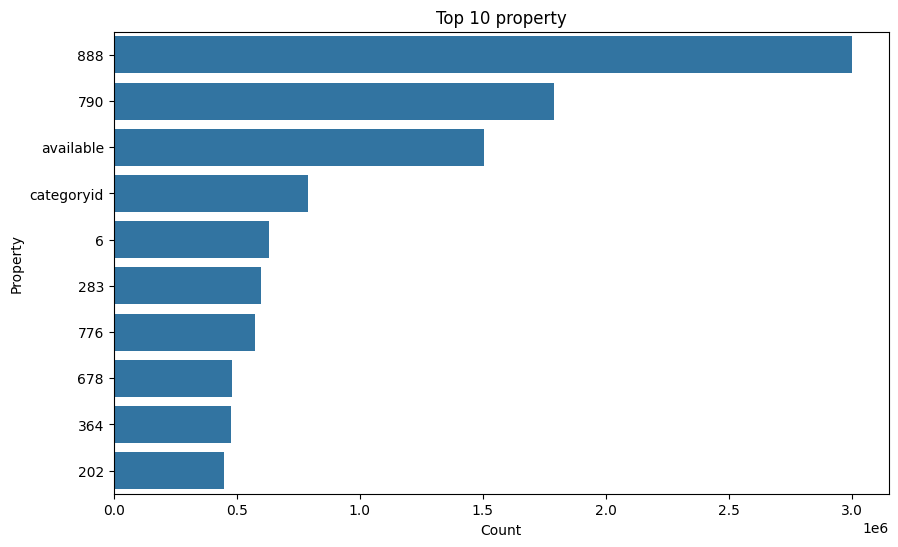

In [22]:
# Distribution of Top 10 Properties
plt.figure(figsize = (10, 6))
top_10_properties = item_props['property'].value_counts().head(10)
sns.barplot(x = top_10_properties.values, y = top_10_properties.index)
plt.title('Top 10 property')
plt.xlabel('Count')
plt.ylabel('Property')
plt.show()

In [23]:
# Display non-numeric item properties
non_numeric_props = item_props[~item_props['property'].str.replace(r'\D', '', regex = True).str.isnumeric()]['property'].unique()
print(non_numeric_props)

['categoryid' 'available']


`Comments:`

- The **Events dataset** shows a funnel-like behavior. That is, many views, fewer add-to-carts, and even fewer transactions.
- Some properties are numeric while others are interpretable, like "available" or "categoryid".
- The Most Frequent Properties include **888, 790, available, categoryid**.
- The proportion of views that result in add-to-cart is **2.60%** and the proportion of add-to-carts that result in transactions is **32.39%**.
- User journeys from 'view' --> 'addtocart' --> 'transaction' is **0.12%**. This indicates that most users only view without making a purchase. 

### 5.0 DATA PREPROCESSING

>> ### 5.1 Item Property

In [24]:
# Make a duplicate of property column as categoryid
item_props['categoryid'] = item_props['property']

# Replace "categoryid" in item_property with corresponding value
item_props.loc[item_props['property'] == 'categoryid', 'categoryid'] = item_props['value']

item_props

,timestamp,date_time,itemid,property,value,second,minute,hour,day,month,year,categoryid
0,1435460400000,2015-06-28 03:00:00,460429,categoryid,1338,0,0,3,28,6,2015,1338
1,1441508400000,2015-09-06 03:00:00,206783,888,1116713 960601 n277.200,0,0,3,6,9,2015,888
2,1439089200000,2015-08-09 03:00:00,395014,400,n552.000 639502 n720.000 424566,0,0,3,9,8,2015,400
3,1431226800000,2015-05-10 03:00:00,59481,790,n15360.000,0,0,3,10,5,2015,790
4,1431831600000,2015-05-17 03:00:00,156781,917,828513,0,0,3,17,5,2015,917
...,...,...,...,...,...,...,...,...,...,...,...,...
20275897,1433646000000,2015-06-07 03:00:00,236931,929,n12.000,0,0,3,7,6,2015,929
20275898,1440903600000,2015-08-30 03:00:00,455746,6,150169 639134,0,0,3,30,8,2015,6
20275899,1439694000000,2015-08-16 03:00:00,347565,686,610834,0,0,3,16,8,2015,686
20275900,1433646000000,2015-06-07 03:00:00,287231,867,769062,0,0,3,7,6,2015,867


In [25]:
# Identify rows where property is "available"
available_rows = item_props[item_props['property'] == 'available'].copy()

# Create a dictionary mapping (timestamp, itemid) to corresponding "value"
available_dict = dict(zip(zip(available_rows['timestamp'], available_rows['itemid']), available_rows['value']))

# Create "availability" column based on the dictionary
item_props.loc[:, 'availability'] = item_props.apply(lambda row: available_dict.get((row['timestamp'], row['itemid']), None), axis = 1)

# Remove rows where property == "available" and timestamp-itemid exists elsewhere
# item_props = item_props[~((item_props['property'] == 'available') & 
#                          item_props.apply(lambda row: (row['timestamp'], row['itemid']) in available_dict, axis=1))]
mask = (item_props['property'] == 'available') & item_props.apply(lambda row: (row['timestamp'], row['itemid']) in available_dict, axis = 1)
item_props = item_props.loc[~mask].copy()

# Drop unnecessary columns
item_props.drop(columns = ['property', 'value'], inplace = True)

# Display the modified dataframe
item_props

,timestamp,date_time,itemid,second,minute,hour,day,month,year,categoryid,availability
0,1435460400000,2015-06-28 03:00:00,460429,0,0,3,28,6,2015,1338,None
1,1441508400000,2015-09-06 03:00:00,206783,0,0,3,6,9,2015,888,1
2,1439089200000,2015-08-09 03:00:00,395014,0,0,3,9,8,2015,400,None
3,1431226800000,2015-05-10 03:00:00,59481,0,0,3,10,5,2015,790,1
4,1431831600000,2015-05-17 03:00:00,156781,0,0,3,17,5,2015,917,None
...,...,...,...,...,...,...,...,...,...,...,...
20275897,1433646000000,2015-06-07 03:00:00,236931,0,0,3,7,6,2015,929,None
20275898,1440903600000,2015-08-30 03:00:00,455746,0,0,3,30,8,2015,6,None
20275899,1439694000000,2015-08-16 03:00:00,347565,0,0,3,16,8,2015,686,None
20275900,1433646000000,2015-06-07 03:00:00,287231,0,0,3,7,6,2015,867,0


In [26]:
# Check for duplicates
item_props.duplicated().sum()

2312

In [27]:
# Drop duplicates and keep the last occurrence
item_props = item_props.drop_duplicates(keep = 'last')
item_props

,timestamp,date_time,itemid,second,minute,hour,day,month,year,categoryid,availability
0,1435460400000,2015-06-28 03:00:00,460429,0,0,3,28,6,2015,1338,None
1,1441508400000,2015-09-06 03:00:00,206783,0,0,3,6,9,2015,888,1
2,1439089200000,2015-08-09 03:00:00,395014,0,0,3,9,8,2015,400,None
3,1431226800000,2015-05-10 03:00:00,59481,0,0,3,10,5,2015,790,1
4,1431831600000,2015-05-17 03:00:00,156781,0,0,3,17,5,2015,917,None
...,...,...,...,...,...,...,...,...,...,...,...
20275897,1433646000000,2015-06-07 03:00:00,236931,0,0,3,7,6,2015,929,None
20275898,1440903600000,2015-08-30 03:00:00,455746,0,0,3,30,8,2015,6,None
20275899,1439694000000,2015-08-16 03:00:00,347565,0,0,3,16,8,2015,686,None
20275900,1433646000000,2015-06-07 03:00:00,287231,0,0,3,7,6,2015,867,0


In [28]:
# Ensure 'categoryid' is of object type in both DataFrames
item_props["categoryid"] = item_props["categoryid"].astype(int)
category_tree["categoryid"] = category_tree["categoryid"].astype(int)

# Merge category tree to item properties
item_prop_tree = item_props.merge(category_tree, on = ['categoryid'], how = 'inner')

# Display the new DataFrame
item_prop_tree

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_17808\2149372716.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  item_props["categoryid"] = item_props["categoryid"].astype(int)


,timestamp,date_time,itemid,second,minute,hour,day,month,year,categoryid,availability,parentid
0,1435460400000,2015-06-28 03:00:00,460429,0,0,3,28,6,2015,1338,None,1278.0
1,1441508400000,2015-09-06 03:00:00,206783,0,0,3,6,9,2015,888,1,866.0
2,1439089200000,2015-08-09 03:00:00,395014,0,0,3,9,8,2015,400,None,110.0
3,1431226800000,2015-05-10 03:00:00,59481,0,0,3,10,5,2015,790,1,1492.0
4,1431831600000,2015-05-17 03:00:00,156781,0,0,3,17,5,2015,917,None,1374.0
...,...,...,...,...,...,...,...,...,...,...,...,...
18659476,1433646000000,2015-06-07 03:00:00,236931,0,0,3,7,6,2015,929,None,1027.0
18659477,1440903600000,2015-08-30 03:00:00,455746,0,0,3,30,8,2015,6,None,933.0
18659478,1439694000000,2015-08-16 03:00:00,347565,0,0,3,16,8,2015,686,None,594.0
18659479,1433646000000,2015-06-07 03:00:00,287231,0,0,3,7,6,2015,867,0,441.0


In [29]:
item_prop_tree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18659481 entries, 0 to 18659480
Data columns (total 12 columns):
 #   Column        Dtype         
---  ------        -----         
 0   timestamp     int64         
 1   date_time     datetime64[ns]
 2   itemid        int64         
 3   second        int32         
 4   minute        int32         
 5   hour          int32         
 6   day           int32         
 7   month         int32         
 8   year          int32         
 9   categoryid    int32         
 10  availability  object        
 11  parentid      float64       
dtypes: datetime64[ns](1), float64(1), int32(7), int64(2), object(1)
memory usage: 1.2+ GB


In [30]:
item_prop_tree.isnull().sum()

timestamp              0
date_time              0
itemid                 0
second                 0
minute                 0
hour                   0
day                    0
month                  0
year                   0
categoryid             0
availability    13008715
parentid           57218
dtype: int64

In [31]:
# Sort by itemid and date_time
events.sort_values(['date_time', 'itemid'], inplace = True)
item_prop_tree.sort_values(['date_time', 'itemid'], inplace = True)

# Drop unnecessary time breakdown columns after sorting
events = events.drop(columns = ['year', 'month', 'day', 'hour', 'minute', 'second'], errors = 'ignore')
item_prop_tree = item_prop_tree.drop(columns = ['year', 'month', 'day', 'hour', 'minute', 'second'], errors = 'ignore')

# Merge using the nearest date_time match within each itemid group
merged_data = pd.merge_asof(
    events,
    item_prop_tree, 
    on = 'date_time',
    by = 'itemid',
    direction = 'backward',
    tolerance = pd.Timedelta(days = 1)  
)

# Display results
print(f"Merged dataset size: {merged_data.shape}")
merged_data

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Merged dataset size: (2756101, 10)


,timestamp_x,date_time,visitorid,event,itemid,transactionid,timestamp_y,categoryid,availability,parentid
0,1430622004384,2015-05-03 03:00:04.384,693516,addtocart,297662,NaN,NaN,NaN,NaN,NaN
1,1430622011289,2015-05-03 03:00:11.289,829044,view,60987,NaN,NaN,NaN,NaN,NaN
2,1430622013048,2015-05-03 03:00:13.048,652699,view,252860,NaN,NaN,NaN,NaN,NaN
3,1430622024154,2015-05-03 03:00:24.154,1125936,view,33661,NaN,NaN,NaN,NaN,NaN
4,1430622026228,2015-05-03 03:00:26.228,693516,view,297662,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2756096,1442545164029,2015-09-18 02:59:24.029,472345,view,301436,NaN,NaN,NaN,NaN,NaN
2756097,1442545165499,2015-09-18 02:59:25.499,1207677,view,310922,NaN,NaN,NaN,NaN,NaN
2756098,1442545174109,2015-09-18 02:59:34.109,255126,view,47467,NaN,NaN,NaN,NaN,NaN
2756099,1442545181778,2015-09-18 02:59:41.778,622226,view,345308,NaN,NaN,NaN,NaN,NaN


In [32]:
# Drop a column
merged_data = merged_data.drop(columns = ['timestamp_y'], errors = 'ignore')

# Rename a column
merged_data = merged_data.rename(columns = {'timestamp_x': 'timestamp'})

# Define the desired column order
column_order = [
    'timestamp', 'date_time', 'visitorid', 'event', 'transactionid', 'itemid', 'categoryid', 'parentid', 'availability'
]

# Reorder the DataFrame
merged_data = merged_data[column_order]

# Display Result
merged_data

,timestamp,date_time,visitorid,event,transactionid,itemid,categoryid,parentid,availability
0,1430622004384,2015-05-03 03:00:04.384,693516,addtocart,NaN,297662,NaN,NaN,NaN
1,1430622011289,2015-05-03 03:00:11.289,829044,view,NaN,60987,NaN,NaN,NaN
2,1430622013048,2015-05-03 03:00:13.048,652699,view,NaN,252860,NaN,NaN,NaN
3,1430622024154,2015-05-03 03:00:24.154,1125936,view,NaN,33661,NaN,NaN,NaN
4,1430622026228,2015-05-03 03:00:26.228,693516,view,NaN,297662,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2756096,1442545164029,2015-09-18 02:59:24.029,472345,view,NaN,301436,NaN,NaN,NaN
2756097,1442545165499,2015-09-18 02:59:25.499,1207677,view,NaN,310922,NaN,NaN,NaN
2756098,1442545174109,2015-09-18 02:59:34.109,255126,view,NaN,47467,NaN,NaN,NaN
2756099,1442545181778,2015-09-18 02:59:41.778,622226,view,NaN,345308,NaN,NaN,NaN


In [33]:
merged_data.isnull().sum()

timestamp              0
date_time              0
visitorid              0
event                  0
transactionid    2733644
itemid                 0
categoryid       2495763
parentid         2496345
availability     2620868
dtype: int64

In [34]:
# Check for anomaly by counting rows where item is not avalaible but there was transaction
anomaly_count = merged_data[(merged_data['availability'] == 0) & (merged_data['transactionid'].notnull())].shape[0]
print(f"Number of anomalies: {anomaly_count}")

Number of anomalies: 0


In [35]:
# Check for users performing multiple actions at the same timestamp
unusual_timestamps = merged_data.groupby(['visitorid', 'timestamp']).size().reset_index(name = 'count')
suspicious_activities = unusual_timestamps[unusual_timestamps['count'] > 1]

print(f"\nNumber of users with repeated actions in the same timestamp: {suspicious_activities.shape[0]}\n")
suspicious_activities


Number of users with repeated actions in the same timestamp: 2600



,visitorid,timestamp,count
1375,745,1440547735041,2
5548,2799,1440099361419,2
6878,3465,1434418664698,3
7662,3926,1434501277715,2
10871,5703,1438030995619,2
...,...,...,...
2737077,1398978,1438628575294,2
2737078,1398978,1438628575325,3
2739627,1400304,1441337839667,2
2741446,1401333,1435092400012,2


`Comment:`

- All datasets have been merged. **2,312** duplicates identified and removed.
- **2,600** users performs multiple actions in the same seconds. This is not possible with humans and indicates bot-like behavior.

In [36]:
# Extract the visitor IDs of users with repeated actions at the same timestamp
bot_users_timestamps = suspicious_activities['visitorid'].unique()

# Remove those users from the dataset
cleaned_data = merged_data[~merged_data['visitorid'].isin(bot_users_timestamps)]

print(f"\nRemoved {len(bot_users_timestamps)} bot-like users. New dataset size: {cleaned_data.shape[0]} rows.\n")


Removed 1681 bot-like users. New dataset size: 2626841 rows.



`Comment:`

- Users performing two or more activities simultaneously indicate bot action or automated actions.
- **1,681** unique of them have been removed.

### 6.0 FEATURE ENGINEERING

In [37]:
# Create a random sample
np.random.seed(42)

rows_to_keep = np.random.choice(cleaned_data.index, size = 100000, replace = False)
sample_data = cleaned_data.loc[rows_to_keep]

sample_data.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,timestamp,date_time,visitorid,event,transactionid,itemid,categoryid,parentid,availability
1472979,1436809555983,2015-07-13 17:45:55.983,633395,view,NaN,27484,NaN,NaN,NaN
1965701,1438714967331,2015-08-04 19:02:47.331,515028,view,NaN,40140,NaN,NaN,NaN
382679,1432221328698,2015-05-21 15:15:28.698,182576,view,NaN,462188,NaN,NaN,NaN
561148,1432954734973,2015-05-30 02:58:54.973,830461,view,NaN,138613,NaN,NaN,NaN
106943,1431055307477,2015-05-08 03:21:47.477,958147,view,NaN,173396,NaN,NaN,NaN


In [38]:
# User_based Feature

user_behavior = sample_data.groupby('visitorid').agg({
    'itemid':'count',
    'categoryid': 'nunique',
    'timestamp': ['min' ,'max','mean']
}).reset_index()

user_behavior.columns = ['visitorid', 'item_count', 'category_count', 'first_interaction', 'last_interaction', 'avg_interaction_time']
user_behavior['time_on_platform'] = user_behavior['last_interaction'] - user_behavior['first_interaction']
user_behavior['time_between_actions'] = user_behavior['time_on_platform'] / (user_behavior['item_count'] - 1)

user_behavior

,visitorid,item_count,category_count,first_interaction,last_interaction,avg_interaction_time,time_on_platform,time_between_actions
0,53,1,0,1436394635749,1436394635749,1.436395e+12,0,NaN
1,65,1,0,1434987569427,1434987569427,1.434988e+12,0,NaN
2,75,1,0,1435616528971,1435616528971,1.435617e+12,0,NaN
3,76,1,0,1435609917671,1435609917671,1.435610e+12,0,NaN
4,85,1,0,1437696691070,1437696691070,1.437697e+12,0,NaN
...,...,...,...,...,...,...,...,...
90515,1407437,1,0,1435098005409,1435098005409,1.435098e+12,0,NaN
90516,1407479,1,0,1434517877607,1434517877607,1.434518e+12,0,NaN
90517,1407492,1,1,1439155006433,1439155006433,1.439155e+12,0,NaN
90518,1407511,1,0,1436941026112,1436941026112,1.436941e+12,0,NaN


In [39]:
# Item_based feature
item_popularity = sample_data.groupby('itemid').agg({
    'visitorid':'count',
     'event': ['nunique',lambda  x : sum(x == 'view'),
              lambda x:sum(x =='addtocart'),
              lambda x:sum(x =='transaction')]
   }).reset_index()

item_popularity.columns=['itemid','user_count','event_count','view_count','addtocart_count','transaction_count']
item_popularity['conversion rate'] = item_popularity['transaction_count']/item_popularity['addtocart_count']
item_popularity

,itemid,user_count,event_count,view_count,addtocart_count,transaction_count,conversion rate
0,6,2,1,2,0,0,NaN
1,16,3,1,3,0,0,NaN
2,19,1,1,1,0,0,NaN
3,24,1,1,1,0,0,NaN
4,25,4,1,4,0,0,NaN
...,...,...,...,...,...,...,...
50386,466830,4,1,4,0,0,NaN
50387,466847,2,1,2,0,0,NaN
50388,466860,1,1,1,0,0,NaN
50389,466861,1,1,0,1,0,0.0


In [40]:
# User_item interaction feature
user_item_interaction = sample_data.groupby(['visitorid', 'itemid']).agg({
    'event':'count',
    'timestamp' : ['min', 'max']
    }).reset_index()
user_item_interaction.columns = ['visitorid', 'itemid', 'interaction_count', 'first_interaction', 'last_interaction']
user_item_interaction['time_between_interaction'] = user_item_interaction['last_interaction'] - user_item_interaction['first_interaction']
user_item_interaction

,visitorid,itemid,interaction_count,first_interaction,last_interaction,time_between_interaction
0,53,217218,1,1436394635749,1436394635749,0
1,65,353515,1,1434987569427,1434987569427,0
2,75,257575,1,1435616528971,1435616528971,0
3,76,278966,1,1435609917671,1435609917671,0
4,85,230005,1,1437696691070,1437696691070,0
...,...,...,...,...,...,...
98069,1407437,389814,1,1435098005409,1435098005409,0
98070,1407479,397424,1,1434517877607,1434517877607,0
98071,1407492,290338,1,1439155006433,1439155006433,0
98072,1407511,241555,1,1436941026112,1436941026112,0


In [41]:
# Merge the features into a single DataFrame
user_features = user_behavior.drop(['first_interaction', 'last_interaction'], axis = 1)
item_features = item_popularity.drop(['view_count', 'addtocart_count', 'transaction_count'], axis = 1)
interaction_features = user_item_interaction.drop(['first_interaction', 'last_interaction'], axis = 1)

features = interaction_features.merge(user_features, on = 'visitorid').merge(item_features, on = 'itemid')
features.head()

,visitorid,itemid,interaction_count,time_between_interaction,item_count,category_count,avg_interaction_time,time_on_platform,time_between_actions,user_count,event_count,conversion rate
0,53,217218,1,0,1,0,1.436395e+12,0,NaN,4,1,NaN
1,65,353515,1,0,1,0,1.434988e+12,0,NaN,3,1,NaN
2,75,257575,1,0,1,0,1.435617e+12,0,NaN,11,1,NaN
3,76,278966,1,0,1,0,1.435610e+12,0,NaN,3,1,NaN
4,85,230005,1,0,1,0,1.437697e+12,0,NaN,1,1,NaN


In [42]:
# Replace infinity values with NaN
features = features.replace([np.inf, -np.inf], np.nan)

# Fill NaN values with the median
features = features.fillna(features.median())
features.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,visitorid,itemid,interaction_count,time_between_interaction,item_count,category_count,avg_interaction_time,time_on_platform,time_between_actions,user_count,event_count,conversion rate
0,53,217218,1,0,1,0,1.436395e+12,0,4.464168e+07,4,1,0.0
1,65,353515,1,0,1,0,1.434988e+12,0,4.464168e+07,3,1,0.0
2,75,257575,1,0,1,0,1.435617e+12,0,4.464168e+07,11,1,0.0
3,76,278966,1,0,1,0,1.435610e+12,0,4.464168e+07,3,1,0.0
4,85,230005,1,0,1,0,1.437697e+12,0,4.464168e+07,1,1,0.0


In [43]:
print(features.dtypes)

visitorid                     int64
itemid                        int64
interaction_count             int64
time_between_interaction      int64
item_count                    int64
category_count                int64
avg_interaction_time        float64
time_on_platform              int64
time_between_actions        float64
user_count                    int64
event_count                   int64
conversion rate             float64
dtype: object


### 7.0 MODEL TRAINING, EVALUATION AND PREDICTION

> ### 7.1  Collaborative Filtering Using Singular Value Decomposition (SVD)

>> ### 7.1.1 Model Training

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from surprise import Reader, Dataset, SVD
from surprise.model_selection import GridSearchCV

In [45]:
# Normalize interaction count
scaler = MinMaxScaler()
features['interaction_count'] = scaler.fit_transform(features[['interaction_count']])

# Split the data
train_data, test_data = train_test_split(features, test_size = 0.2, random_state = 42)

In [46]:
# Define reader and dataset
reader = Reader(rating_scale = (0, 1))
train_dataset = Dataset.load_from_df(train_data[['visitorid', 'itemid', 'interaction_count']], reader)
trainset = train_dataset.build_full_trainset()

# Hyperparameter tuning using GridSearchCV
param_grid = {'n_factors': [10, 50, 100], 'n_epochs': [20, 50], 'lr_all': [0.002, 0.005], 'reg_all': [0.02, 0.1]}
gs = GridSearchCV(SVD, param_grid, measures = ['rmse', 'mae'], cv = 2, n_jobs = -1)
gs.fit(train_dataset)

In [47]:
# Train the best SVD model
best_params = gs.best_params['rmse']
algo = SVD(n_factors = best_params['n_factors'], n_epochs = best_params['n_epochs'], 
           lr_all = best_params['lr_all'], reg_all = best_params['reg_all'])

algo.fit(trainset)

>> ### 7.1.2 Model Evaluation

In [48]:
# Prepare testset for evaluation
testset = list(zip(test_data['visitorid'], test_data['itemid'], test_data['interaction_count']))
predictions = algo.test(testset)

# Model Evaluation
mae = mean_absolute_error(test_data['interaction_count'], [pred.est for pred in predictions])
mse = mean_squared_error(test_data['interaction_count'], [pred.est for pred in predictions])
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.5f}")
print(f"Mean Squared Error (MSE): {mse:.5f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.5f}")

<IPython.core.display.Javascript object>

Mean Absolute Error (MAE): 0.00453
Mean Squared Error (MSE): 0.00037
Root Mean Squared Error (RMSE): 0.01931


`Comment:`

- The **MAE, MSE & RMSE** shows the model is performing very well

>> ### 7.1.3 Prediction

In [49]:
# Function to get top recommendations
def get_top_n(predictions, n = 5):
    top_n = {}
    for uid, iid, true_r, est, _ in predictions:
        if uid not in top_n:
            top_n[uid] = []
        top_n[uid].append((iid, est))

    # Sort and keep top n items per user
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key = lambda x: x[1], reverse = True)
        top_n[uid] = user_ratings[:n]
    
    return top_n

# Get top-N recommendations
top_n = get_top_n(predictions, n = 5)

# Select 10 users who have at least 5 recommendations
eligible_users = [uid for uid in top_n if len(top_n[uid]) >= 5]
if len(eligible_users) < 10:
    print('Warning: Less than 10 users have at least 5 recommendations.')
    sample_users = eligible_users  # Use all available users
else:
    sample_users = np.random.choice(eligible_users, 10, replace = False)

# Create structured DataFrame with safe indexing
recommendations_df = pd.DataFrame({
    'User ID': sample_users,
    'Recommendation_1': [top_n[user][0][0] if len(top_n[user]) > 0 else 'No Recommendation' for user in sample_users],
    'Recommendation_2': [top_n[user][1][0] if len(top_n[user]) > 1 else 'No Recommendation' for user in sample_users],
    'Recommendation_3': [top_n[user][2][0] if len(top_n[user]) > 2 else 'No Recommendation' for user in sample_users],
    'Recommendation_4': [top_n[user][3][0] if len(top_n[user]) > 3 else 'No Recommendation' for user in sample_users],
    'Recommendation_5': [top_n[user][4][0] if len(top_n[user]) > 4 else 'No Recommendation' for user in sample_users]
})

# Display Result
print('\nTop 5 Recommended items for users:\n')
recommendations_df

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Top 5 Recommended items for users:



,User ID,Recommendation_1,Recommendation_2,Recommendation_3,Recommendation_4,Recommendation_5
0,468309,327633,95625,463577,253795,72478
1,79627,418606,175751,443227,117274,266448
2,1349799,119914,108063,318120,341812,65215
3,1119917,116274,385261,316509,43565,318525
4,471992,411373,383735,348793,29656,66146
5,1015599,46789,120513,124878,430527,351165
6,95405,12739,437006,211418,382466,356360
7,591869,384506,98491,223829,241555,444487
8,310759,313391,30929,312581,442251,192552
9,909859,118780,199442,13582,201586,188086


> ### 7.2 Hybrid Recommendation: SVD-based and content-based filtering (TF-IDF + Nearest Neighbors)

>> ### 7.2.1 Model Training

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
from surprise import Dataset, Reader, SVD, KNNBasic
from surprise.model_selection import train_test_split, GridSearchCV
from surprise.accuracy import rmse, mae
from collections import defaultdict

In [51]:
# Load dataset
df = sample_data.copy()

np.random.seed(42)

new_rows_to_keep = np.random.choice(cleaned_data.index, size = 10000, replace = False)
df = df.loc[new_rows_to_keep]

# Event weight mapping (more importance to transactions)
event_weights = {'view': 1, 'addtocart': 3, 'transaction': 5}
df['event_weight'] = df['event'].map(event_weights)

# Handle missing values
df.fillna({'categoryid': -1, 'parentid': -1}, inplace = True)

# Aggregate data: weighted interactions per visitor-item pair
interaction_data = df.groupby(['visitorid', 'itemid'])['event_weight'].sum().reset_index(name = 'interaction_score')

# Prepare data for Surprise library
reader = Reader(rating_scale = (0, interaction_data['interaction_score'].max()))
data = Dataset.load_from_df(interaction_data[['visitorid', 'itemid', 'interaction_score']], reader)

# Train-test split
trainset, testset = train_test_split(data, test_size = 0.2)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [52]:
# Hyperparameter tuning for SVD
param_grid = {
    'n_factors': [50, 100, 200],   
    'lr_all': [0.001, 0.005, 0.01, 0.02],  
    'reg_all': [0.005, 0.01, 0.02, 0.05]  
}

gs = GridSearchCV(SVD, param_grid, measures = ['rmse', 'mae'], cv = 3)
gs.fit(data)
best_params = gs.best_params['rmse']

print('The Best SVD Parameters are:')
print(f"{'-'*40}\n")
print(best_params)

The Best SVD Parameters are:
----------------------------------------

{'n_factors': 50, 'lr_all': 0.001, 'reg_all': 0.05}


In [53]:
# Train best SVD model
svd = SVD(n_factors = best_params['n_factors'], reg_all = best_params['reg_all'], lr_all = best_params['lr_all'])
svd.fit(trainset)

In [54]:
# Content-Based Filtering using TF-IDF + Nearest Neighbors
df['categoryid'] = df['categoryid'].astype(str)  # Convert category to string for TF-IDF
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df['categoryid'])  # Sparse matrix

# Nearest Neighbors model
nn_model = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
nn_model.fit(tfidf_matrix)

# Hybrid Recommendation Function
def recommend_items(visitor_id, top_n = 5, alpha = 0.7):
    """Generate top-N recommendations using Hybrid (SVD + Content-Based)"""

    viewed_items = interaction_data[interaction_data['visitorid'] == visitor_id]['itemid'].values
    item_scores = []

    for item in df['itemid'].unique():
        if item in viewed_items:
            continue

        # Collaborative filtering score (SVD)
        cf_score = svd.predict(visitor_id, item).est

        # Content-based similarity score
        item_idx = df.index[df['itemid'] == item].tolist()
        
        if len(item_idx) == 0:  
            cb_score = 0  # Assign default score if item not found
        else:
            item_idx = item_idx[0]  # Get first matching index
            try:
                distances, indices = nn_model.kneighbors(tfidf_matrix[item_idx], n_neighbors = 6)
                cb_score = np.mean([1 - d for d in distances.flatten()[1:]])  # Invert cosine distance
            except IndexError:
                cb_score = 0  # Handle any index issues
        
        # Hybrid scoring
        final_score = (alpha * cf_score) + ((1 - alpha) * cb_score)
        item_scores.append((item, final_score))

    # Sort & return top-N items
    item_scores.sort(key = lambda x: x[1], reverse = True)
    return [item[0] for item in item_scores[:top_n]]

>> ### 7.2.2 Model Evaluation

In [55]:
predictions = svd.test(testset)

# RMSE & MAE
print(f"RMSE & MAE:")
print(f"{'-'*40}\n")
rmse_score = rmse(predictions)
mae_score = mae(predictions)

# Precision@K & Recall@K
def precision_recall_at_k(predictions, k = 5, threshold = 3.5):
    """Compute Precision@K and Recall@K for recommendations"""
    user_recs = defaultdict(list)
    actual_interactions = defaultdict(set)

    for uid, iid, true_r, est, _ in predictions:
        user_recs[uid].append((iid, est))
        if true_r >= threshold:
            actual_interactions[uid].add(iid)

    precisions, recalls = [], []

    for uid, recs in user_recs.items():
        recs.sort(key = lambda x: x[1], reverse = True)
        recommended_items = [iid for iid, _ in recs[:k]]

        if len(actual_interactions[uid]) > 0:
            hits = len(set(recommended_items) & actual_interactions[uid])
            precisions.append(hits / k)
            recalls.append(hits / len(actual_interactions[uid]))

    return np.mean(precisions), np.mean(recalls)

precision, recall = precision_recall_at_k(predictions, k = 5)

print(f"\nPrecision@K and Recall@K:")
print(f"{'-'*40}\n")
print(f"Precision@5: {precision:.4f}")
print(f"Recall@5: {recall:.4f}")

RMSE & MAE:
----------------------------------------

RMSE: 0.4426
MAE:  0.1340


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Precision@K and Recall@K:
----------------------------------------

Precision@5: 0.2000
Recall@5: 1.0000


>> ### 7.2.3 Prediction

In [56]:
# Select 10 random unique visitors
sample_visitors = interaction_data['visitorid'].drop_duplicates().sample(10, random_state = 42).tolist()

# Generate recommendations for each visitor
recommendation_data = []
for visitor in sample_visitors:
    recommendations = recommend_items(visitor)
    recommendation_data.append([visitor] + recommendations)

# Convert results into a DataFrame
columns = ['visitorid'] + [f"recommendation_{i+1}" for i in range(5)]
recommendation_df = pd.DataFrame(recommendation_data, columns = columns)

# Display recommendations
recommendation_df

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,visitorid,recommendation_1,recommendation_2,recommendation_3,recommendation_4,recommendation_5
0,944589,40158,400574,144405,144820,67013
1,1396710,40158,144405,400574,317003,287688
2,616806,144405,400574,40158,48794,276282
3,438488,144405,400574,40158,256036,13031
4,447900,144405,400574,40158,441158,301354
5,1218781,40158,400574,325231,200858,382610
6,434317,40158,400574,357564,144405,446522
7,327584,40158,144405,400574,175421,44465
8,243745,40158,400574,144405,137697,461686
9,575118,40158,400574,144405,312357,397563
